<a href="https://colab.research.google.com/github/aguscura/Python-Deep-Learning/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
%tensorflow_version 2.x 

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.2


In [61]:
# Load Data

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# La carga del conjunto de datos (load_data) devuelve cuatro matrices. Dos matrices de entrenamiento y dos matrices de testeo.

In [62]:
train_labels[1]
#Las labels vienen directamente con números. Por eso podemos crear una lista para llevar esos números a prendas.

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [63]:
#Procedemos a escalar los valores en el rango de 0 a 1 para facilitar el entrenamiento. Recordar que puntualmente al escalar evitamos justamente problemas de escalas distintas en el conjunto de datos.

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images = train_images / 255.0
test_images = test_images / 255.0

#Verificamos la forma de nuestros datos! Importante

print("Train images shape: ", train_images.shape)
print(len(train_labels))
print("Test images shape: ", test_images.shape)
print(len(test_labels))

Train images shape:  (60000, 28, 28)
60000
Test images shape:  (10000, 28, 28)
10000


In [64]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

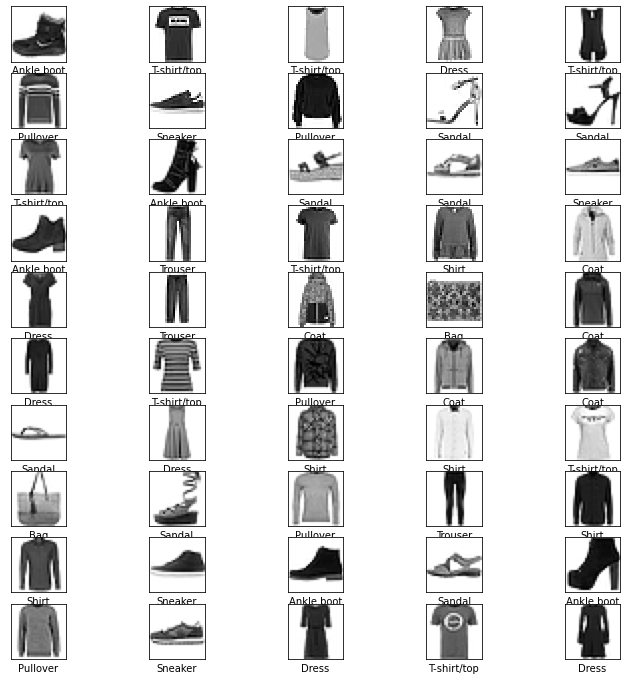

In [65]:
# Visualizamos las primeras 20 imagenes del conjunto de datos Fashion MNIST:

plt.figure(figsize=(12,12)) #Configuramos el tamaño de lo que se va a ver.
for i in range (0,50):
        plt.subplot(10,5, i+1) #Subplot permite imprimir varios graficos/imagenes contiguas con el fin de compararlas --> 'subplot(nrows, ncols, index, **kwargs)'
        plt.xticks([]) #TICKS son las marquitas divisorias del eje. En este caso el eje x. Pasando una lista vacía desaparecen esas marcas
        plt.yticks([]) #TICKS son las marquitas divisorias del eje. En este caso el eje y. Pasando una lista vacía desaparecen esas marcas
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i]])

plt.show()

In [66]:
# Modelo
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [67]:
model.summary()

""" La primera capa es el vector 'aplastado'. Antes, habiamos usado la funcion reshape de numpy. Ahora directamente keras nos ofrece la posibilidad de hacerlo con 'Flatten'
    Observar que la primera capa 'flatten_1' no tiene parametros entrenables. Es el input de la imagen de 28x28 con las filas apiladas en un unico vector unidimensional.
"""

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                7850      
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


" La primera capa es el vector 'aplastado'. Antes, habiamos usado la funcion reshape de numpy. Ahora directamente keras nos ofrece la posibilidad de hacerlo con 'Flatten'\n    Observar que la primera capa 'flatten_1' no tiene parametros entrenables. Es el input de la imagen de 28x28 con las filas apiladas en un unico vector unidimensional.\n"

In [68]:
# Específicamos algunos parámetros del modelo:

model.compile(optimizer='sgd', #Tipo de optimización para la actualización de los parámetros del modelo.
              loss='sparse_categorical_crossentropy', #Funcion de coste. Dirige el entrenamiento en la dirección correcta.
              metrics=['accuracy'])

In [69]:
#Train

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.8175 - accuracy: 0.4507
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2228 - accuracy: 0.6366
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9807 - accuracy: 0.6874
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8629 - accuracy: 0.7155
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7862 - accuracy: 0.7394


In [70]:
# Evaluation

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy: ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.7727 - accuracy: 0.7359
Test accuracy:  0.7358999848365784


In [71]:
# Predictions

predictions = model.predict(test_images)
print(predictions[5]) #example
print("Etiqueta supuesta por el modelo: ", np.argmax(predictions[5]))
print("Etiqueta real: ", test_labels[5])

[1.8486436e-02 8.7276208e-01 8.3120130e-03 4.4133678e-02 1.7210340e-02
 3.1480619e-03 1.1561430e-02 2.1954641e-02 3.2270170e-04 2.1085825e-03]
Etiqueta supuesta por el modelo:  1
Etiqueta real:  1


In [72]:
# Funcion para representar gráficamente los resultados:

# i --> Indice
# predictions_array --> Arreglo de 10 numeros con las probabilidades de las diferentes prendas.
# true_label --> Array con todas las etiquetas correctas de las 10.000 imagenes de prueba.
# img --> Las 10.000 imágenes.

def plot_image(i, predictions_array, true_label, img):
  
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]

  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)

  if (predicted_label == true_label):
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{}  {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color = color)

In [73]:
# i --> Indice
# predictions_array --> Arreglo de 10 numeros con las probabilidades de las diferentes prendas.
# true_label --> Array con todas las etiquetas correctas de las 10.000 imagenes de prueba.

def plot_value_array(i, predictions_array, true_label):

    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(10)) # Rango de 0 a 9.
    plt.yticks([])

    thisplot = plt.bar(range(10), predictions_array, color="blue") #A priori todas las barras, azules.
    plt.ylim([0,1]) #limite del eje y
    predicted_label = np.argmax(predictions_array)

    #IMPORTANTE
    """Estas ultimas dos lineas lo que hacen es: Sí la true label coincide con la predicted label, te va a mostrar esa barra en color negro (ejemplo del pantalon) y obviamente el resto de las 
    barras en color azul. Si NO coinciden, o sea que hay un error de predicción, vamos a tener la true label de negro, la predicted label (errónea) de rojo y el resto de color azul."""

    thisplot[predicted_label].set_color('red') 
    thisplot[true_label].set_color('black')

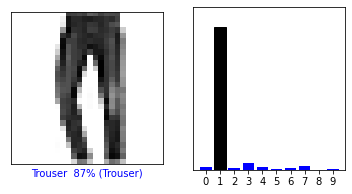

In [74]:
i = 5
plt.figure(figsize =(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

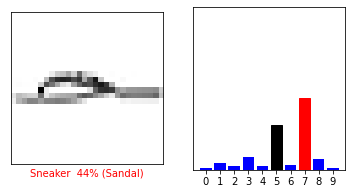

In [75]:
i = 8
plt.figure(figsize =(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

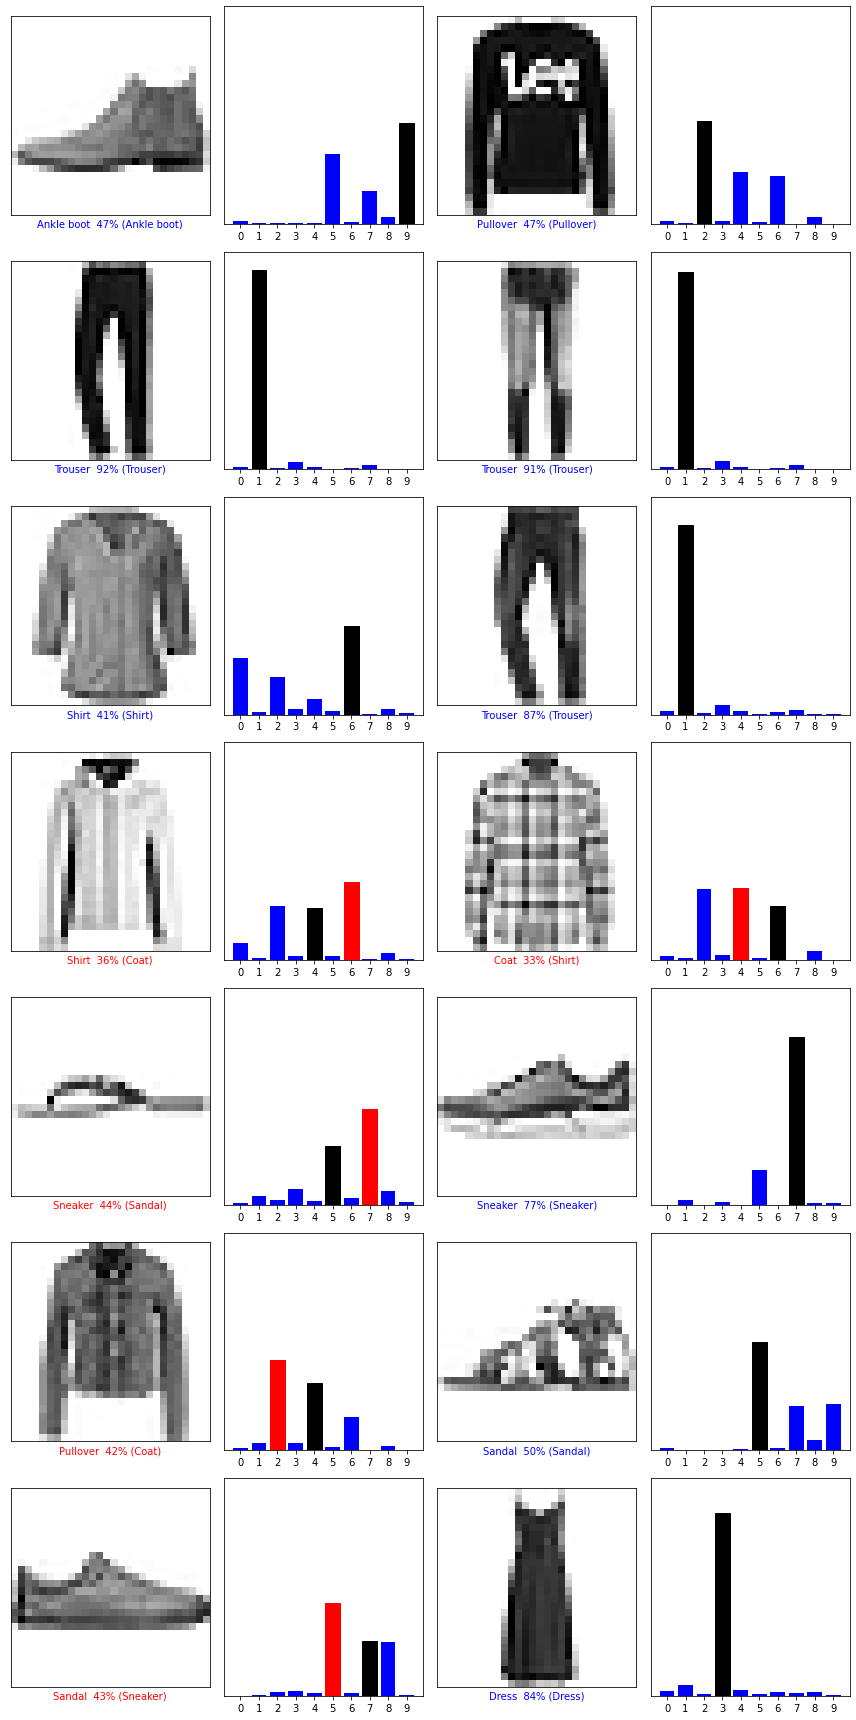

In [82]:
num_rows = 7
num_cols = 2
num_images = num_rows*num_cols # UNA sola imagen se compone de los 2 graficos. El de la ropa y el de barras.

plt.figure(figsize=(12,24))
for i in range (num_images):
  plt.subplot(num_rows, num_cols*2, 2*i+1)
  plot_image(i,predictions,test_labels, test_images)
  plt.subplot(num_rows, num_cols*2, 2*i+2)
  plot_value_array(i, predictions, test_labels)

plt.tight_layout()
plt.show()